In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('../assets/billboard.csv')


### PART 1: Data cleaning

In [2]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [3]:

# estimating difference in days between the time songs entered the chart and peaked the chart

df['date.entered1']=df['date.entered'].apply(lambda x: pd.to_datetime(x));
df['date.peaked1']=df['date.peaked'].apply(lambda x: pd.to_datetime(x));
df['days.to.peak']=abs(df['date.entered1']-df['date.peaked1']);
df['days.to.peak'].head()

0   56 days
1   56 days
2   98 days
3   35 days
4   70 days
Name: days.to.peak, dtype: timedelta64[ns]

In [4]:
# converting track length into seconds

df['track.length']=df['time'].map(lambda x: int(x.split(',')[0])*60 + int(x.split(',')[1]))
print df['track.length'].head()

0    218
1    258
2    247
3    225
4    218
Name: track.length, dtype: int64


In [5]:
# separating month entered 

df['month.entered']=df['date.entered'].map(lambda y: y.split(' ')[0])

print df['month.entered'].head()

0    September
1     February
2      October
3       August
4       August
Name: month.entered, dtype: object


In [6]:
# separating month peaked 

df['month.peaked']=df['date.peaked'].map(lambda y: y.split(' ')[0])
print df['month.peaked'].head()



0     November
1        April
2      January
3    September
4      October
Name: month.peaked, dtype: object


In [7]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x73rd.week,x74th.week,x75th.week,x76th.week,date.entered1,date.peaked1,days.to.peak,track.length,month.entered,month.peaked
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,2000-09-23,2000-11-18,56 days,218,September,November
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,2000-02-12,2000-04-08,56 days,258,February,April
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,1999-10-23,2000-01-29,98 days,247,October,January
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,2000-08-12,2000-09-16,35 days,225,August,September
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,2000-08-05,2000-10-14,70 days,218,August,October


In [8]:
val_list=list(df.iloc[:, 7:-6])
print val_list


['x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week', 'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week', 'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week', 'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week', 'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week', 'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week', 'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week', 'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', 'x65th.week', 'x66th.week', 'x67th.week', 'x68th.week', 'x69th.week', 'x70th.week', 'x71st.week', 'x72nd.week', 

In [9]:
# transforming columns [:, 7:-6] into two raws weeks.in.chart and peak.position

df_clean =pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'genre','days.to.peak', 'track.length', 'month.entered', 'month.peaked'], value_vars=val_list,var_name='weeks.in.chart', value_name='peak.position')
df_clean.head()

,year,artist.inverted,track,genre,days.to.peak,track.length,month.entered,month.peaked,weeks.in.chart,peak.position
0,2000,Destiny's Child,Independent Women Part I,Rock,56 days,218,September,November,x1st.week,78
1,2000,Santana,"Maria, Maria",Rock,56 days,258,February,April,x1st.week,15
2,2000,Savage Garden,I Knew I Loved You,Rock,98 days,247,October,January,x1st.week,71
3,2000,Madonna,Music,Rock,35 days,225,August,September,x1st.week,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,70 days,218,August,October,x1st.week,57


In [10]:
# getting rid of x

df_clean['weeks.in.chart']=df_clean['weeks.in.chart'].map(lambda x: x[1:])
print df_clean['weeks.in.chart'].head()

0    1st.week
1    1st.week
2    1st.week
3    1st.week
4    1st.week
Name: weeks.in.chart, dtype: object


In [11]:
# converting weeks in chart into float

def split_weeks_more(x):
    if len(x)==8:
        return x[0]
    else:
        return x[0:2]

    
df_clean['weeks.in.chart']=df_clean['weeks.in.chart'].map(split_weeks_more);
df_clean['weeks.in.chart']=df_clean['weeks.in.chart'].apply(lambda x: float(x));
# print df_clean['weeks.in.chart].head()

In [12]:
df_clean.head()

,year,artist.inverted,track,genre,days.to.peak,track.length,month.entered,month.peaked,weeks.in.chart,peak.position
0,2000,Destiny's Child,Independent Women Part I,Rock,56 days,218,September,November,1.0,78
1,2000,Santana,"Maria, Maria",Rock,56 days,258,February,April,1.0,15
2,2000,Savage Garden,I Knew I Loved You,Rock,98 days,247,October,January,1.0,71
3,2000,Madonna,Music,Rock,35 days,225,August,September,1.0,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,70 days,218,August,October,1.0,57


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 10 columns):
year               24092 non-null int64
artist.inverted    24092 non-null object
track              24092 non-null object
genre              24092 non-null object
days.to.peak       24092 non-null timedelta64[ns]
track.length       24092 non-null int64
month.entered      24092 non-null object
month.peaked       24092 non-null object
weeks.in.chart     24092 non-null float64
peak.position      23247 non-null object
dtypes: float64(1), int64(2), object(6), timedelta64[ns](1)
memory usage: 1.8+ MB


In [14]:
# converting day.diff into float

df_clean['days.to.peak']=df_clean['days.to.peak'].apply(lambda x: float(x.days) )

In [15]:
# converting track.length into float

df_clean['track.length']=df_clean['track.length'].apply(lambda x: float(x))

In [16]:
df_clean.head()

,year,artist.inverted,track,genre,days.to.peak,track.length,month.entered,month.peaked,weeks.in.chart,peak.position
0,2000,Destiny's Child,Independent Women Part I,Rock,56.0,218.0,September,November,1.0,78
1,2000,Santana,"Maria, Maria",Rock,56.0,258.0,February,April,1.0,15
2,2000,Savage Garden,I Knew I Loved You,Rock,98.0,247.0,October,January,1.0,71
3,2000,Madonna,Music,Rock,35.0,225.0,August,September,1.0,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,70.0,218.0,August,October,1.0,57


In [17]:
df_clean['genre'].value_counts()

Rock           7828
Country        5624
Rap            4408
Rock'n'roll    2584
R&B             988
R & B           760
Pop             684
Latin           684
Electronica     304
Jazz             76
Gospel           76
Reggae           76
Name: genre, dtype: int64

In [18]:
# changing 'R & B' into 'R&B'

df_clean['genre']=df_clean['genre'].apply(lambda x: 'R&B' if x=='R & B' else x);
df_clean['genre'].value_counts()

Rock           7828
Country        5624
Rap            4408
Rock'n'roll    2584
R&B            1748
Pop             684
Latin           684
Electronica     304
Jazz             76
Gospel           76
Reggae           76
Name: genre, dtype: int64

In [19]:
# replacing missing place in chart with N/A (assuming that having no peak position means that a song exited the chart)

def replace_str(value):
    print type(value),value
    try:
        return float(value)
    except:
        return np.nan
      

In [20]:
%%capture
df_clean['peak.position']=df_clean['peak.position'].apply(replace_str)  

In [21]:
df_clean = df_clean.dropna()

In [22]:
df_clean.head()

,year,artist.inverted,track,genre,days.to.peak,track.length,month.entered,month.peaked,weeks.in.chart,peak.position
0,2000,Destiny's Child,Independent Women Part I,Rock,56.0,218.0,September,November,1.0,78.0
1,2000,Santana,"Maria, Maria",Rock,56.0,258.0,February,April,1.0,15.0
2,2000,Savage Garden,I Knew I Loved You,Rock,98.0,247.0,October,January,1.0,71.0
3,2000,Madonna,Music,Rock,35.0,225.0,August,September,1.0,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,70.0,218.0,August,October,1.0,57.0


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 10 columns):
year               5307 non-null int64
artist.inverted    5307 non-null object
track              5307 non-null object
genre              5307 non-null object
days.to.peak       5307 non-null float64
track.length       5307 non-null float64
month.entered      5307 non-null object
month.peaked       5307 non-null object
weeks.in.chart     5307 non-null float64
peak.position      5307 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 456.1+ KB


In [24]:
df_clean= df_clean.drop(df_clean.iloc[:, 0:2], axis = 1)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 8 columns):
track             5307 non-null object
genre             5307 non-null object
days.to.peak      5307 non-null float64
track.length      5307 non-null float64
month.entered     5307 non-null object
month.peaked      5307 non-null object
weeks.in.chart    5307 non-null float64
peak.position     5307 non-null float64
dtypes: float64(4), object(4)
memory usage: 373.1+ KB


In [26]:
df_clean.isnull().sum()

track             0
genre             0
days.to.peak      0
track.length      0
month.entered     0
month.peaked      0
weeks.in.chart    0
peak.position     0
dtype: int64

In [27]:
# df_clean = df_clean.fillna(float(0))
# df_clean.isnull().sum()

In [28]:
df_clean.to_csv(path_or_buf="../assets/clean_data.csv",index=False)

### PART 2: Explanatory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_csv('../assets/clean_data.csv')

In [3]:
df.head()

,track,genre,days.to.peak,track.length,month.entered,month.peaked,weeks.in.chart,peak.position
0,Independent Women Part I,Rock,56.0,218.0,September,November,1.0,78.0
1,"Maria, Maria",Rock,56.0,258.0,February,April,1.0,15.0
2,I Knew I Loved You,Rock,98.0,247.0,October,January,1.0,71.0
3,Music,Rock,35.0,225.0,August,September,1.0,41.0
4,Come On Over Baby (All I Want Is You),Rock,70.0,218.0,August,October,1.0,57.0


In [4]:
df.head()

,track,genre,days.to.peak,track.length,month.entered,month.peaked,weeks.in.chart,peak.position
0,Independent Women Part I,Rock,56.0,218.0,September,November,1.0,78.0
1,"Maria, Maria",Rock,56.0,258.0,February,April,1.0,15.0
2,I Knew I Loved You,Rock,98.0,247.0,October,January,1.0,71.0
3,Music,Rock,35.0,225.0,August,September,1.0,41.0
4,Come On Over Baby (All I Want Is You),Rock,70.0,218.0,August,October,1.0,57.0


In [5]:
df.describe()

,days.to.peak,track.length,weeks.in.chart,peak.position
count,5307.000000,5307.000000,5307.000000,5307.000000
mean,71.243829,241.869983,11.470699,51.052384
std,51.491451,39.961922,9.001300,28.966198
min,0.000000,156.000000,1.000000,1.000000
25%,42.000000,220.000000,5.000000,26.000000
50%,63.000000,236.000000,10.000000,51.000000
75%,84.000000,257.000000,16.000000,76.000000
max,315.000000,470.000000,65.000000,100.000000


In [6]:
df_corr=pd.pivot_table(df, index=['track','genre','month.entered', 'month.peaked'],values=['track.length','days.to.peak','weeks.in.chart','peak.position'])
df_corr.reset_index(inplace=True)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 8 columns):
track             317 non-null object
genre             317 non-null object
month.entered     317 non-null object
month.peaked      317 non-null object
days.to.peak      317 non-null float64
peak.position     317 non-null float64
track.length      317 non-null float64
weeks.in.chart    317 non-null float64
dtypes: float64(4), object(4)
memory usage: 19.9+ KB


In [7]:
my_list = df_corr["track"].tolist()
with open("test2.txt", "w") as my_file:
    for item in my_list:
        my_file.write("%s\n" % item)

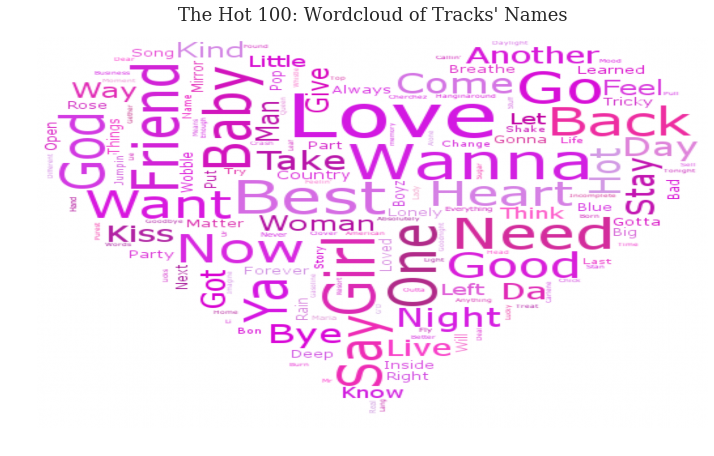

In [59]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy.misc import imread

from wordcloud import WordCloud, STOPWORDS



text = open("test2.txt").read()

plt.subplots( figsize=(12, 7))

my_mask = imread('./heart.png', flatten=True)

wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      background_color='white', margin=4,random_state=4,mask=my_mask,\
                      max_font_size=70,min_font_size=6,prefer_horizontal=.7,relative_scaling=.3,\
                      font_step=2
#                       width=1800,
#                       height=1400
                     ).generate(text)


def color_func(word, font_size, position, orientation, random_state=4,
                    **kwargs):
    return "hsl(310, 140%%, %d%%)" % random.randint(30, 85)
plt.imshow(wordcloud)
plt.title("The Hot 100: Wordcloud of Tracks' Names", fontsize=18,family='serif', y=1.03)
plt.imshow(wordcloud.recolor(color_func=color_func, random_state=4),
           interpolation="gaussian",alpha=.8,aspect='auto')
plt.axis('off')
# plt.savefig('./mypic.png', dpi=500)
plt.show()


# 'none', 'nearest', 'bilinear', 'bicubic',
#     'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser',
#     'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc',
#     'lanczos

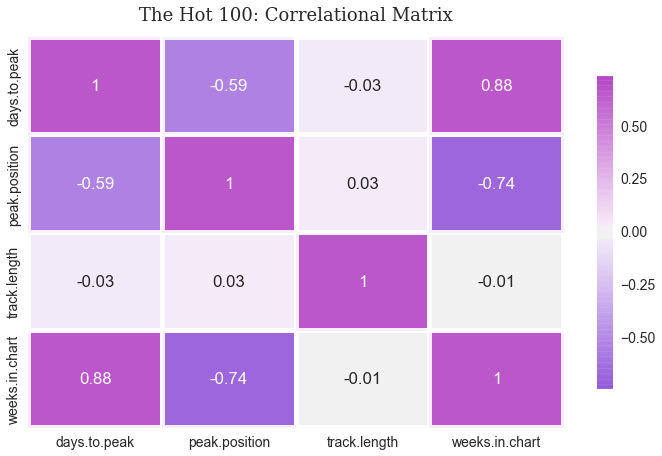

In [58]:
corr = df_corr.corr().round(decimals=2)
sns.set(font_scale=1.4)
plt.subplots( figsize=(12, 7))
#cmap = sns.diverging_palette(300, 350, as_cmap=True)
#cmap = sns.diverging_palette(65, 300, as_cmap=True)
cmap = sns.diverging_palette(280, 300, as_cmap=True)
sns.heatmap (corr, annot=True,alpha=.9, cmap=cmap,cbar_kws={"shrink": .8},linewidths=4,vmax=.2)
plt.title("The Hot 100: Correlational Matrix", fontsize=18,family='serif', y=1.03)
plt.show()

In [7]:
df_gen=df_corr.groupby(['genre'])['track'].nunique().to_frame('Count')
df_gen.reset_index(inplace=True)
df_genre=df_gen.sort_values('Count')

df_genre

,genre,Count
2,Gospel,1
3,Jazz,1
8,Reggae,1
1,Electronica,4
4,Latin,9
5,Pop,9
6,R&B,23
10,Rock'n'roll,34
7,Rap,58
0,Country,74


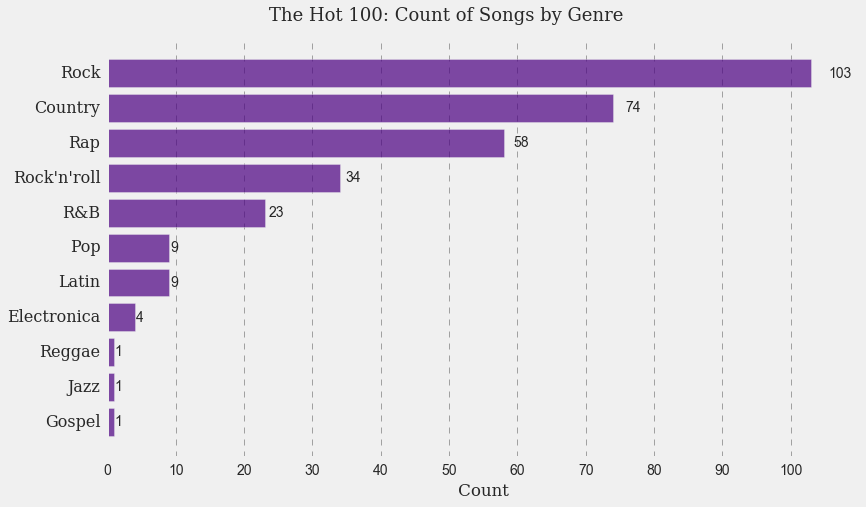

In [8]:
plt.style.use('fivethirtyeight')
fig, axes=plt.subplots(figsize=(12,7))


pos = list(range(len(df_genre['genre'])))

axes.barh(pos, df_genre['Count'],alpha=.7,color='indigo',align="center")
axes.set_title('The Hot 100: Count of Songs by Genre', y=1.03,x=.45, fontsize=18,family="serif")
for rect in axes.patches:
    width = rect.get_width()
    axes.text(1.025*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center')
axes.grid(color='gray', linestyle='--', alpha=.7)
axes.yaxis.grid(False)
axes.set_yticks(pos)
axes.set_ylim([-1,11])
axes.set_xlim([0,110])
axes.set_xticks(range(0,110, 10))
axes.set_yticklabels(df_genre['genre'], size =16,family='serif')
axes.set_xlabel('Count',family='serif')

In [9]:
df1=pd.pivot_table(df,columns=['genre'], values=['track.length']).T
df1.reset_index(inplace=True)


df_track=df1.sort_values('track.length')
df_track

,genre,track.length
5,Pop,224.729927
0,Country,228.703333
7,Rap,242.556750
9,Rock,244.892273
10,Rock'n'roll,245.980344
4,Latin,249.485549
6,R&B,249.900383
8,Reggae,257.000000
1,Electronica,274.166667
2,Gospel,330.000000


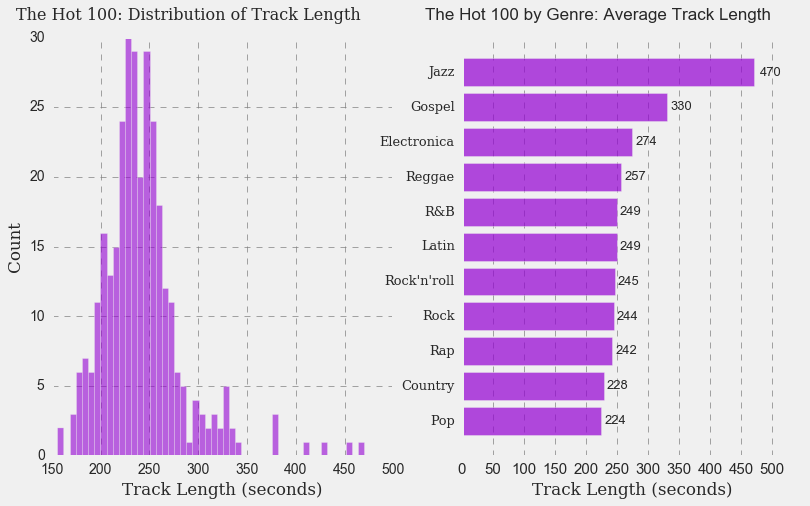

In [10]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1,2, figsize=(12,7))



axes[0].hist(df_corr['track.length'], bins=50, color='darkviolet', alpha=.6)
axes[0].set_title('The Hot 100: Distribution of Track Length', y=1.03,x=.4, fontsize=16,family='serif')
axes[0].grid(color='gray', linestyle='--', alpha=.7)
axes[0].set_ylabel('Count',family="serif")
axes[0].set_xlabel('Track Length (seconds)',family="serif")


pos = list(range(len(df_track['genre'])))
width = 0.50
axes[1].barh(pos, df_track['track.length'],alpha=.7,color='darkviolet',align="center")
axes[1].set_title('The Hot 100 by Genre: Average Track Length', y=1.03, x=.4, fontsize=17)
axes[1].grid(color='gray', linestyle='--', alpha=.7)
axes[1].yaxis.grid(False)
for rect in axes[1].patches:
    width = rect.get_width()
    axes[1].text(1.02*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center', size=13)
# axes[1].invert_yaxis()
plt.yticks(pos)
plt.ylim([-1,11])
plt.xlim([0,550])
plt.xticks(range(0,550, 50), fontsize=15)
axes[1].set_yticklabels(df_track['genre'], size =13,family="serif")
axes[1].set_xlabel('Track Length (seconds)',family="serif")

plt.show()

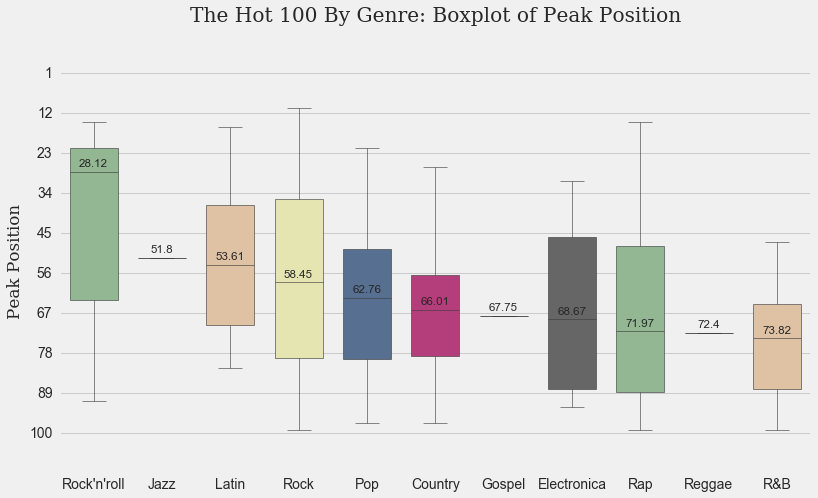

,peak.position
genre,
Rock'n'roll,28.120238
Jazz,51.800000
Latin,53.611111
Rock,58.450000
Pop,62.764706
Country,66.006579
Gospel,67.750000
Electronica,68.666667
Rap,71.971429


In [80]:
plt.subplots(figsize=(12, 7))



ax=sns.boxplot (x="genre", y = "peak.position", data=df_corr,palette = 'Accent', saturation=0.5,\
             linewidth=.6, width=.7, order=["Rock'n'roll",'Jazz','Latin','Rock','Pop', 'Country','Gospel',\
            'Electronica','Rap','Reggae','R&B'])
ax.set_ylim([-5,110])
ax.set_yticks(range(1,110, 11))
ax.set_xlabel('')
# ax.set_xticklabels(df_corr['genre'],size=13.5,family="serif")
plt.gca().invert_yaxis()
ax.set_ylabel('Peak Position',family="serif")
ax.set_title("The Hot 100 By Genre: Boxplot of Peak Position",y=1.06,family="serif")


medians = df_corr.groupby(['genre'])['peak.position'].median().sort_values()
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]-1.5, median_labels[tick], 
            horizontalalignment='center', size='small')
plt.show()


df_corr.groupby('genre')['peak.position'].median().sort_values().to_frame()

In [18]:
colors = {'Rock' : 'y', 
          'Country' : 'm', 
          'Rap' : 'teal', 
          "Rock'n'roll" : 'indigo', 
          'Electronica' : 'Darkgoldenrod', 
          'Latin' : 'coral', 
          'R&B':'Maroon',
          'Pop' : 'gold', 
          'Reggae' : 'darkgreen', 
          'Jazz' : 'k', 
          'Gospel' : 'Grey'}

genre_list = ['Rock', 'Country', 'Rap', 'R&B', 'Pop', 'Latin', 'Electronica', 'Jazz', "Rock'n'roll",\
              'Reggae', 'Gospel']

In [19]:
def rand_jitter(arr, jigglefactor):
    stdev = jigglefactor*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

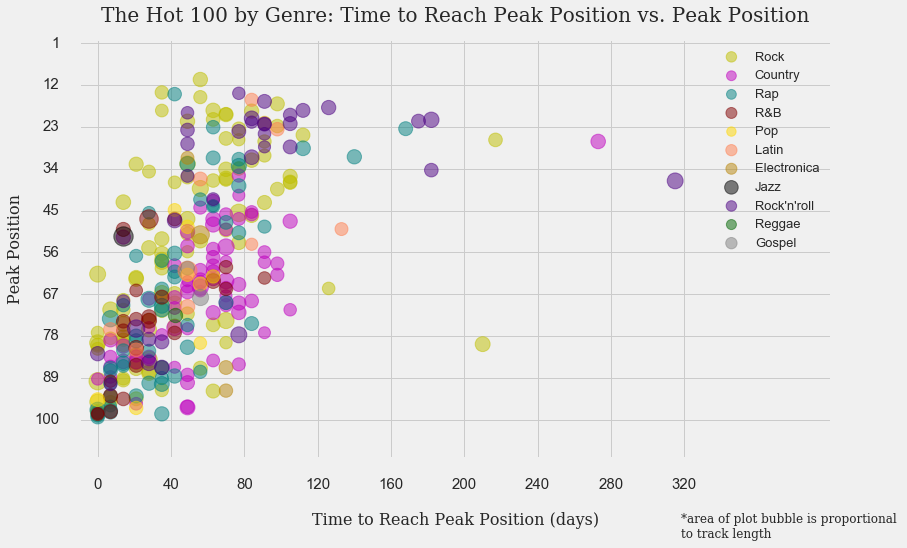

In [23]:
plt.style.use('bmh')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))

for i in genre_list:
    y = df_corr[df_corr['genre'] == i]
    plt.scatter(y['days.to.peak'], rand_jitter(y['peak.position'], 0.004), \
                color = colors[i], s=y['track.length']*.8, alpha=.5, label = i, linewidth='1')
#edgecolor='grey', 
#facecolors='none', 
#marker='0
plt.xlabel('Time to Reach Peak Position (days)',fontsize=16, labelpad=20,family="serif")
plt.ylabel('Peak Position',fontsize=16, labelpad=10,family="serif")
plt.title('The Hot 100 by Genre: Time to Reach Peak Position vs. Peak Position', fontsize = 20,y=1.03,family="serif")
plt.xlim([-10, 400])
plt.ylim([0,110])
plt.gca().invert_yaxis()
plt.tick_params(axis='both', which='major', pad=20)
plt.xticks(range(0,360, 40), fontsize=15)
plt.yticks(range(1,111, 11), fontsize=15)
plt.legend(loc='upper right', fontsize = 13,markerscale=.7)
plt.annotate('*area of plot bubble is proportional \nto track length', (1,0), \
             (-150, -55), xycoords='axes fraction', textcoords='offset points', \
             va='top', fontsize = 12,family="serif")
plt.show()


In [31]:
df_ts=pd.pivot_table(df, index=['weeks.in.chart'], columns=['genre'], values=['peak.position'])
df_ts.reset_index(drop=True)
df_ts.columns = df_ts.columns.droplevel(0)
df_ts.head()

genre,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock,Rock'n'roll
weeks.in.chart,,,,,,,,,,,
1.0,82.405405,84.5,76.0,89.0,73.222222,79.222222,84.086957,85.172414,72.0,76.155340,76.000000
2.0,75.256757,71.0,76.0,89.0,64.333333,68.000000,74.095238,76.228070,72.0,67.705882,64.294118
3.0,71.808219,64.0,74.0,7.0,58.777778,65.500000,67.190476,68.781818,63.0,62.090000,55.029412
4.0,68.309859,61.0,69.0,8.0,52.666667,60.333333,60.894737,63.925926,56.0,56.123711,48.000000
5.0,65.271429,57.0,68.0,66.0,52.000000,52.125000,61.473684,60.384615,62.0,51.904255,42.000000


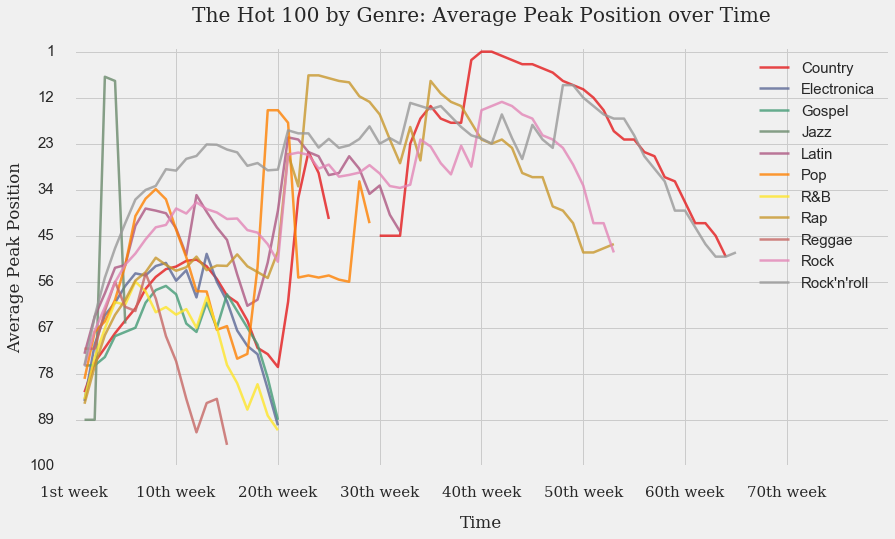

In [101]:
plt.style.use('bmh')
plt.style.use('fivethirtyeight')
df_ts.plot(colormap='Set1',figsize=(13,7), alpha=.8,linewidth=2.5)
plt.xlabel('Time',labelpad=15,family="serif")
plt.ylabel('Average Peak Position',family="serif")
#plt.grid(color='gray', linestyle='--', alpha=.5)
plt.legend(loc='upper right', fontsize=15)
plt.xlim([0,80])
plt.ylim([0,100])
plt.gca().invert_yaxis()
plt.tick_params(axis='both', which='major', pad=20)
plt.title("The Hot 100 by Genre: Average Peak Position over Time", y=1.05,family="serif")
plt.xticks(range(0,90, 10),('1st week','10th week','20th week','30th week','40th week','50th week','60th week','70th week')
           , fontsize=15, family="serif")
plt.yticks(range(1,111, 11), fontsize=15)
plt.show()

In [33]:
df_ent=df_corr.groupby(['month.entered'])['days.to.peak'].mean().to_frame()
df_ent.reset_index(inplace=True)
df_entered=df_ent.sort_values('days.to.peak',ascending=True )

df_entered

,month.entered,days.to.peak
2,December,33.703704
7,March,38.629630
3,February,40.600000
1,August,48.034483
9,November,51.500000
4,January,55.034483
5,July,56.318182
6,June,56.608696
11,September,59.370370
0,April,60.242424


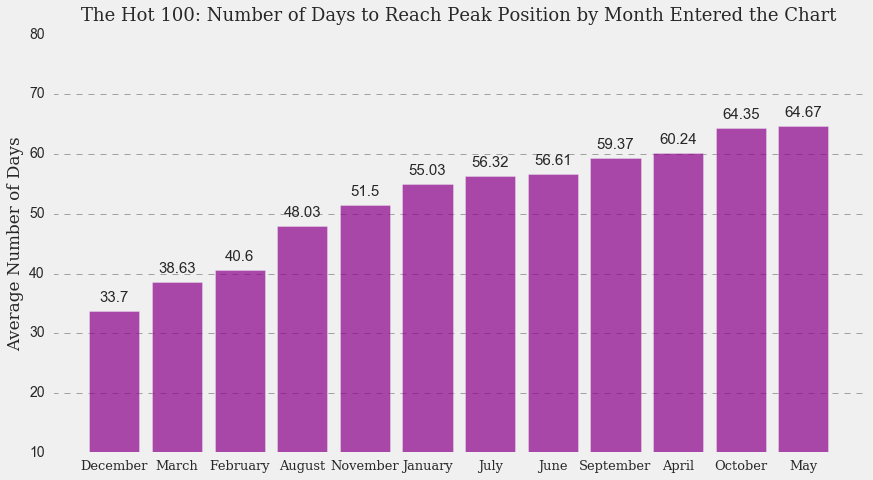

In [104]:
plt.style.use('fivethirtyeight')

fig, axes=plt.subplots(figsize=(13,7))


pos = list(range(len(df_entered['month.entered'])))

axes.bar(pos, df_entered['days.to.peak'],alpha=.7,color='darkmagenta',align="center")
axes.set_title('The Hot 100: Number of Days to Reach Peak Position by Month Entered the Chart'
               , y=1.02, fontsize=18,family="serif")
axes.grid(color='gray', linestyle='--', alpha=.7)
for i, label in enumerate(list(df_entered.index)):
    score = df_entered.ix[label][1].round(2)
    axes.annotate(str(score), (i, score + 1.5),ha='center', size=15) 
axes.xaxis.grid(False)
axes.set_xticks(pos)
axes.set_xlim([-1,12])
axes.set_ylim([10,70])
axes.set_yticks(range(10,90, 10))
axes.set_xticklabels(df_entered['month.entered'], size =13,family="serif")
axes.set_ylabel('Average Number of Days',family="serif")
plt.show()